<a href="https://colab.research.google.com/github/MrCat2357/Principios-de-Imageamento-Digital/blob/main/Adi%C3%A7%C3%A3o_e_subtra%C3%A7%C3%A3o_de_filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

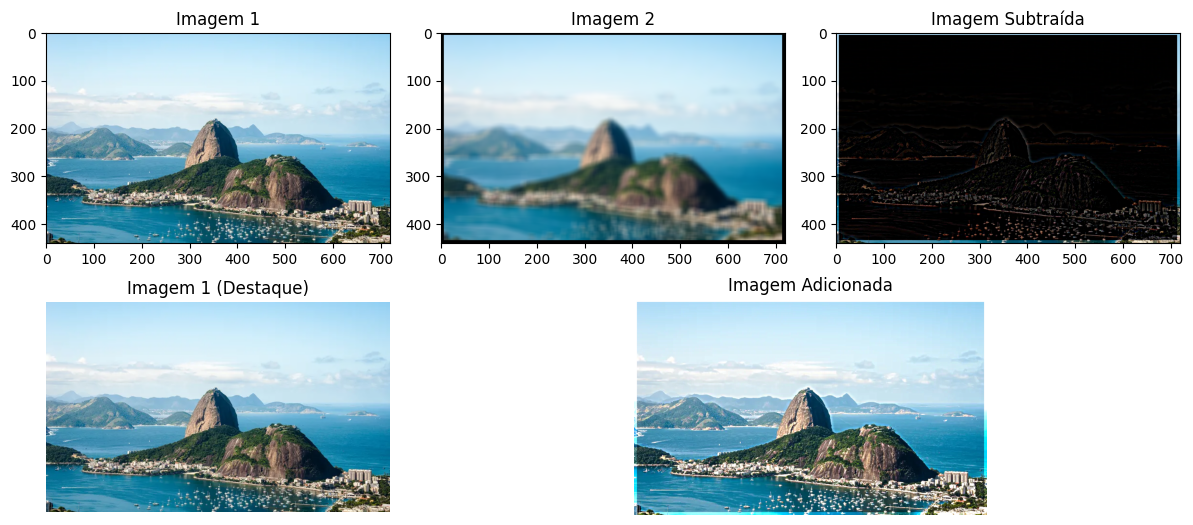

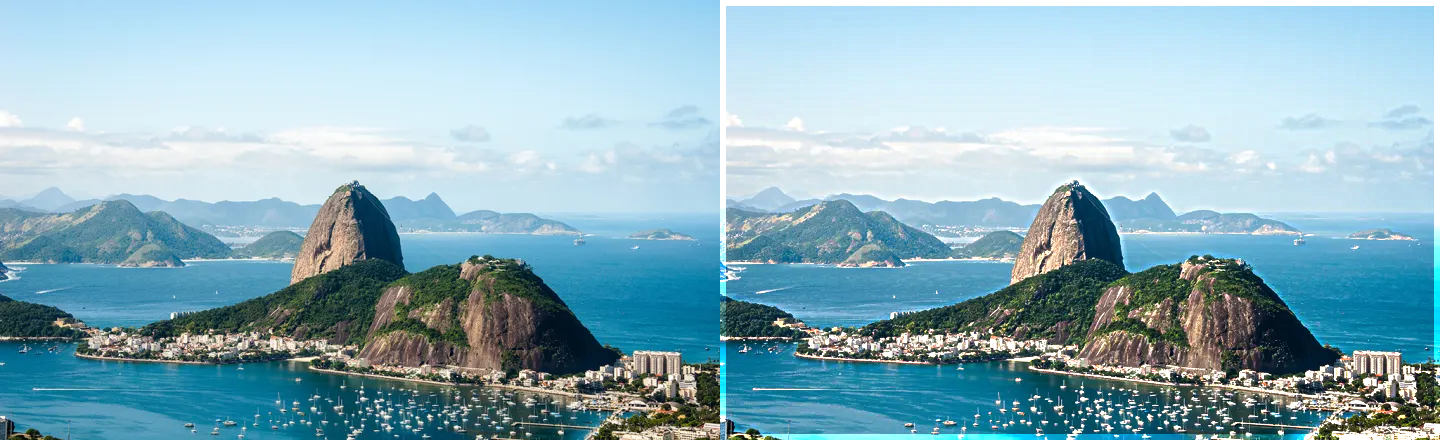

In [10]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def apply_average_mask(image, kernel_size):
    height, width = image.shape[:2]
    filtered_image = np.zeros((height, width, 3), dtype=np.uint8)

    # Calcula o tamanho do padding
    pad = kernel_size // 2

    # Percorre a imagem
    for i in range(pad, height - pad):
        for j in range(pad, width - pad):
            # Calcula a média aritmética para cada canal de cor
            for k in range(3):
                total = 0
                for m in range(-pad, pad + 1):
                    for n in range(-pad, pad + 1):
                       total += image[i + m, j + n, k]
                filtered_image[i, j, k] = total // (kernel_size * kernel_size)

    return filtered_image
# Carregando as imagens
imagem1 = cv2.imread('/content/pao_de_açucar.png')


# Catulinho aplicando o filtro
imagem2 = apply_average_mask(imagem1, 13)

# Subtraindo as imagens
imagem_subtraida = cv2.subtract(imagem1, imagem2)

# Somando
imagem_adicionada = cv2.add(imagem_subtraida, imagem1)

# Configurando o subplot
plt.figure(figsize=(12, 8))

# Plotando a primeira linha de imagens (imagem1, imagem2, imagem_subtraida)
plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(imagem1, cv2.COLOR_BGR2RGB))
plt.title('Imagem 1')

plt.subplot(3, 3, 2)
plt.imshow(cv2.cvtColor(imagem2, cv2.COLOR_BGR2RGB))
plt.title('Imagem 2')

plt.subplot(3, 3, 3)
plt.imshow(cv2.cvtColor(imagem_subtraida, cv2.COLOR_BGR2RGB))
plt.title('Imagem Subtraída')

# Plotando a segunda linha de imagens (imagem1 em destaque e imagem_adicionada)
plt.subplot(3, 3, 4)
plt.imshow(cv2.cvtColor(imagem1, cv2.COLOR_BGR2RGB))
plt.title('Imagem 1 (Destaque)')
plt.axis('off')  # Desativando os eixos

plt.subplot(3, 3, (5, 6))
plt.imshow(cv2.cvtColor(imagem_adicionada, cv2.COLOR_BGR2RGB))
plt.title('Imagem Adicionada')

# Escondendo os eixos para todas as imagens
plt.axis('off')

# Exibindo o plot
plt.tight_layout()
plt.show()

# Criando uma imagem com as duas imagens lado a lado
resultado = cv2.hconcat([imagem1,imagem_adicionada])

# Mostrando o resultado
cv2_imshow(resultado)
cv2.waitKey(0)
cv2.destroyAllWindows()